In [192]:
try:
    if pgl is not None:
        pgl.cleanUp()
        #pgl = None
        print("PGL Close")
except NameError:
    
    print("No PGL is open")

================================ pglBase:close =================================
(pglBase:close) Closing connection to mglMetal application
(pglBase:close) Closing mglMetal application with PID 37195
(pglBase:close) mglMetal application with PID: 37195 was killed successfully.
(pgl:_pglComm) Closed socket: /Users/justin/Library/Containers/gru.mglMetal/Data/pglMetal.socket.20251231_215944.58eBQpWmcq
(pglBase:removeOrphanedSockets) No orphaned sockets found in /Users/justin/Library/Containers/gru.mglMetal/Data
PGL Close


In [184]:
%load_ext autoreload
%autoreload 2

#import pgl
from pgl import pgl as pglLibrary
from pgl import pglProPixx
from pgl import pglDataPixx
from pgl import pglTrackPixx
from pgl import pglEyelink
from pgl import pglExperiment, pglTask, pglParameter, pglParameterBlock
from pgl import pglCalibrationDeviceMinolta, pglCalibration
import numpy as np
pgl = pglLibrary()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
================================ pglBase: init =================================
(pgl:checkOS) Python version: 3.12.3 | packaged by conda-forge | (main, Apr 15 2024, 18:35:20) [Clang 16.0.6 ]
(pgl:checkOS) Running on MacBook Pro (MacBookPro18,3) with macOS version: 26.1
(pgl:checkOS) Apple M1 Pro Cores: 8 (6 performance and 2 efficiency) Memory: 32 GB
(pgl:checkOS) GPU: Apple M1 Pro (Built-In) 14 cores, Metal 4 support
(pgl:checkOS)   Color LCD [Main Display]: 3024 x 1964 Retina (Built-in Liquid Retina XDR Display) GammaTable size: 1024
(pglBase) Main library instance created


In [193]:
pgl = pglLibrary()
pgl.open(0,800,600)
pgl.visualAngle(57, 60,40)

================================ pglBase: init =================================
(pgl:checkOS) Python version: 3.12.3 | packaged by conda-forge | (main, Apr 15 2024, 18:35:20) [Clang 16.0.6 ]
(pgl:checkOS) Running on MacBook Pro (MacBookPro18,3) with macOS version: 26.1
(pgl:checkOS) Apple M1 Pro Cores: 8 (6 performance and 2 efficiency) Memory: 32 GB
(pgl:checkOS) GPU: Apple M1 Pro (Built-In) 14 cores, Metal 4 support
(pgl:checkOS)   Color LCD [Main Display]: 3024 x 1964 Retina (Built-in Liquid Retina XDR Display) GammaTable size: 1024
(pglBase) Main library instance created
================================= pglBase:open =================================
(pglBase:open) Starting mglMetal application: /Users/justin/Library/Developer/Xcode/DerivedData/Build/Products/Debug/mglMetal.app
(pglBase:open) Using socket with address: /Users/justin/Library/Containers/gru.mglMetal/Data/pglMetal.socket.20251231_220547.HfnrWPCISW
(pgl:_pglComm) .Connected to: /Users/justin/Library/Containers/gru.mgl

In [194]:
m = pgl.movie("path/to/movie.mp4");
#pgl.flush()

(pglStimulusMovie) Sending 6.0 vertices to PGL
(pglStimulusMovie:init) Created movie 1 (1 total movies)
(pglBase) Main library closed


In [ ]:
pgl.flush()
pgl.flush()
pgl.flush()
pgl.flush()
pgl.fullScreen(True)
pgl.flush()
pgl.flush()
pgl.flush()
pgl.flush()
m.play()
pgl.fullScreen(False)
#pgl.flush()

(pglStimulusMovie:play) Movie played 126 frames.
'frame num:       0       1       2       3       4       5       6       7       8       9      10      11      12      13      14      15      16      17      18      19      20      21      22      23      24      25      26      27      28      29      30      31      32      33      34      35      36      37      38      39      40      41      42      43      44      45      46      47      48      49      50      51      52      53      54      55      56      57      58      59      60      61      62      63      64      65      66      67      68      69      70      71      72      73      74      75      76      77      78      79      80      81      82      83      84      85      86      87      88      89      90      91      92      93      94      95      96      97      98      99     100     101     102     103     104     105     106     107     108     109     110     111     112     113     114     115     116    

In [128]:
pgl.fullScreen()

True

In [137]:
from pglStaircase import pglStaircaseUpDown
# staircase
upDown = pglStaircaseUpDown()

================================ pglBase:close =================================
(pglBase:close) Closing connection to mglMetal application
(pgl:_pglComm) ❌ Error finding PID: Command '['lsof', '-U', '/Users/justin/Library/Containers/gru.mglMetal/Data/pglMetal.socket.20251227_223153.ifn6KoYU6O']' returned non-zero exit status 1.
(pglBase:close) ❌ Could not find PID of mglMetal application
(pglBase) Main library closed
(pglBase) Main library closed


lsof: status error on /Users/justin/Library/Containers/gru.mglMetal/Data/pglMetal.socket.20251227_223153.ifn6KoYU6O: No such file or directory
lsof 4.91
 latest revision: ftp://lsof.itap.purdue.edu/pub/tools/unix/lsof/
 latest FAQ: ftp://lsof.itap.purdue.edu/pub/tools/unix/lsof/FAQ
 latest man page: ftp://lsof.itap.purdue.edu/pub/tools/unix/lsof/lsof_man
 usage: [-?abhlnNoOPRtUvVX] [+|-c c] [+|-d s] [+D D] [+|-f[cgG]]
 [-F [f]] [-g [s]] [-i [i]] [+|-L [l]] [+|-M] [-o [o]] [-p s]
 [+|-r [t]] [-s [p:s]] [-S [t]] [-T [t]] [-u s] [+|-w] [-x [fl]] [--] [names]
Use the ``-h'' option to get more help information.


ModuleNotFoundError: No module named 'pglStaircase'

Index 0: R=0.000000, G=0.000000, B=0.000000
Index 1: R=0.000978, G=0.000978, B=0.000978
Index 2: R=0.001955, G=0.001955, B=0.001955
Index 3: R=0.002933, G=0.002933, B=0.002933
Index 4: R=0.003910, G=0.003910, B=0.003910
Index 5: R=0.004888, G=0.004888, B=0.004888
Index 6: R=0.005865, G=0.005865, B=0.005865
Index 7: R=0.006843, G=0.006843, B=0.006843
Index 8: R=0.007820, G=0.007820, B=0.007820
Index 9: R=0.008798, G=0.008798, B=0.008798
Index 10: R=0.009775, G=0.009775, B=0.009775
Index 11: R=0.010753, G=0.010753, B=0.010753
Index 12: R=0.011730, G=0.011730, B=0.011730
Index 13: R=0.012708, G=0.012708, B=0.012708
Index 14: R=0.013685, G=0.013685, B=0.013685
Index 15: R=0.014663, G=0.014663, B=0.014663
Index 16: R=0.015640, G=0.015640, B=0.015640
Index 17: R=0.016618, G=0.016618, B=0.016618
Index 18: R=0.017595, G=0.017595, B=0.017595
Index 19: R=0.018573, G=0.018573, B=0.018573
Index 20: R=0.019550, G=0.019550, B=0.019550
Index 21: R=0.020528, G=0.020528, B=0.020528
Index 22: R=0.021505

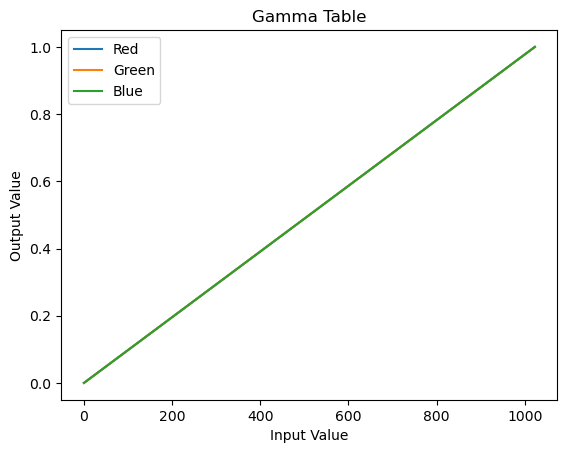

In [36]:
from matplotlib import pyplot as plt
gammaTable = pgl.getGammaTable(1)
plt.plot(gammaTable[0], label='Red')
plt.plot(gammaTable[1], label='Green')
plt.plot(gammaTable[2], label='Blue')
plt.title('Gamma Table')
plt.xlabel('Input Value')
plt.ylabel('Output Value')
plt.legend()
plt.show()

In [35]:
displayNumber = 1
tableSize = pgl.getGammaTableSize(displayNumber)
gamma = 1
lin = np.linspace(0, 1, tableSize, dtype=np.float32)
red = lin ** gamma
green = lin ** gamma
blue = lin ** gamma
pgl.setGammaTable(displayNumber, red, green, blue)


In [ ]:
pglMinolta = pglCalibrationDeviceMinolta()

In [ ]:
pglMinolta.measure()

In [6]:
pgl = pglLibrary()
pgl.open(0,800,600)
pgl.visualAngle(57, 60,40)

================================ pglBase: init =================================
(pgl:checkOS) Python version: 3.12.3 | packaged by conda-forge | (main, Apr 15 2024, 18:35:20) [Clang 16.0.6 ]
(pgl:checkOS) Running on MacBook Pro (MacBookPro18,3) with macOS version: 26.1
(pgl:checkOS) Apple M1 Pro Cores: 8 (6 performance and 2 efficiency) Memory: 32 GB
(pgl:checkOS) GPU: Apple M1 Pro (Built-In) 14 cores, Metal 4 support
(pgl:checkOS)   Color LCD [Main Display]: 3024 x 1964 Retina (Built-in Liquid Retina XDR Display) GammaTable size: 1024
(pglBase) Main library instance created
(pglBase) Main library closed
================================= pglBase:open =================================
(pglBase:open) Starting mglMetal application: /Users/justin/Library/Developer/Xcode/DerivedData/Build/Products/Debug/mglMetal.app
(pglBase:open) Using socket with address: /Users/justin/Library/Containers/gru.mglMetal/Data/pglMetal.socket.20251220_020623.y37aKVVrL9
(pgl:_pglComm) .Connected to: /Users/jus

In [ ]:
pglCal = pglCalibration(pgl, pglMinolta)
pglCal.calibrate(nSteps=8, nRepeats=2)

In [5]:
# Set up task class
class pglRandomDotTask(pglTask):
    
    ########################
    def __init__(self, pgl):
        super().__init__()
        self.name = "Random Dot Motion Task"
        self.rdk = pgl.randomDots(width=15, height=10)
    
    ########################
    def updateScreen(self):
        if self.currentSegment==0:
            self.rdk.display(direction=self.currentParams['dir'], coherence=self.currentParams['coherence'], speed=5.0)

# initialize task
t = pglRandomDotTask(pgl)

# set trial segments
t.seglen = [1, 0.5]

# add parameters for coherence and direction
coherence = pglParameter('coherence',(0.5,1))
dir = pglParameter('dir',np.arange(0,360,180))
t.addParameter(pglParameterBlock([dir, coherence]))



In [7]:
# Set up experiment
e = pglExperiment(pgl)

# add the random dot motion task
e.addTask(t)

# and run the experiment
e.run()

================================= pglBase:open =================================
(pglBase:open) Starting mglMetal application: /Users/justin/Library/Developer/Xcode/DerivedData/Build/Products/Debug/mglMetal.app
(pglBase:open) Using socket with address: /Users/justin/Library/Containers/gru.mglMetal/Data/pglMetal.socket.20251227_233059.it7gXH8G9T
(pgl:_pglComm) .Connected to: /Users/justin/Library/Containers/gru.mglMetal/Data/pglMetal.socket.20251227_233059.it7gXH8G9T
(pgl:_resolution:getResolution) Display 0/1: 1512x982 120Hz 32bits
(pgl:open) mglMetal error log can be viewed in MacOS Console app by searching for PROCESS mglMetal or in a terminal with:
log stream --level info --process mglMetal
(pgl:open) To search for something specifc, e.g. messages from mglMovie:
log stream --predicate 'eventMessage CONTAINS "mglMovie"' --style syslog --level info
(pglKeyboard:start) Starting keyboard listener.
(pglKeyboard) Keyboard listener initialized.
(pglExperiment:run) Waiting for key press (['

In [ ]:
from pgl import pglKeyboard
print(pgl.devices)
print([d for d in pgl.devices if isinstance(d, pglKeyboard)])
print(pgl.devicesGet(pglKeyboard))

In [ ]:
-1%1

In [9]:
p = pglParameter('coherence',(0,0.5,1),helpStr='Coherence')
#p = pglParameter('dir',('left','right'),helpStr='Direction of motion')

print(p)

TypeError: pglParameter.__init__() got an unexpected keyword argument 'helpStr'

In [ ]:
print(e)

In [ ]:
#e.initScreen()
e.run()
e.endScreen()

In [ ]:
if pgl is None: pgl = pglLibrary()
pgl.open(0,880,600,stable=True)
#pgl.open()
pgl.visualAngle(57,40,30)
#datapixx = pglDataPixx()
#pgl.devicesAdd(datapixx)
keyboardDevice = pglKeyboard()
pgl.devicesAdd(keyboardDevice)

In [9]:
radialCheckerboard = pgl.radialCheckerboard(pgl,type='sliding',theta=0,innerRadius=0,outerRadius=6,radialWidth=360,checkRadialWidth=7.5,temporalSquareWave=False)
for i in range(10*120):
    radialCheckerboard.display()
    pgl.flush()
print(radialCheckerboard)


<pglStimulusCheckerboard: center: (0, 0) theta: 0.0 radius: 0->6 radialWidth: 360.0 checkSize: 7.499999999999999x1.0 color: [[1. 1. 1.]
 [0. 0. 0.]]>


In [11]:
from PIL import Image
im = Image.open("testimage.jpg")
pgl.clearScreen(0)
pgl.imageDisplay(im)
pgl.flush()


(pglImage:imageDelete) Deleting image 1 (5616x3744)


True

In [ ]:
#from pgl import pglEyelink
from pgl import pglEyelinkCustomDisplay
#eyelink = pglEyelink(pgl)
#customDisplay = pglEyelinkCustomDisplay(pgl,eyelink)

customDisplay = pglEyelinkCustomDisplay(pgl)

customDisplay.clear_cal_display()
customDisplay.draw_line(00,0,500,500,0)
customDisplay.draw_lozenge(100,200,100,300,0)
customDisplay.draw_cal_target(300,300)
#customDisplay.get_input_key()
#pgl.flush()

In [ ]:
eyelink = pglEyelink(pgl)

In [ ]:
pgl.devicesPoll()
eyelink.calibrate()
#eyelink.close()

In [ ]:
eyelink.close()

In [ ]:
from pgl import pglKeyboard
keyboardDevice = pglKeyboard()
#keyboardDevice.stopListener()

In [92]:
#pgl.dots([1,3,4],[2,5,8],color=[[1,0,0],[0,1,0],[0,0,1]])
#color=[[1,0,0],[0,1,0],[0,0,1],[1,0,0]]
#rdk = pglRandomDotStimulus(pgl,width=10, height=10)
pgl.commandRecord()
rdk = pgl.randomDots(width=10, height=10, noiseType='movshon')
print(rdk)
for i in range(60*10):
    rdk.display(direction=181, coherence=0.4, speed=7.0)
    pgl.flush()
#pgl.flush()
pgl.commandRecordStop()
pgl.commandList()


<pglStimulusRandomDot: 1000 dots, size=0.1, shape=1, aperture=elliptical>
(pglCommandReplayer) Recorded 1200 pgl commands.
Command 0: mglDots (Value: 1005, Data length: 3)
Command 1: mglFlush (Value: 1001, Data length: 1)
Command 2: mglDots (Value: 1005, Data length: 3)
Command 3: mglFlush (Value: 1001, Data length: 1)
Command 4: mglDots (Value: 1005, Data length: 3)
Command 5: mglFlush (Value: 1001, Data length: 1)
Command 6: mglDots (Value: 1005, Data length: 3)
Command 7: mglFlush (Value: 1001, Data length: 1)
Command 8: mglDots (Value: 1005, Data length: 3)
Command 9: mglFlush (Value: 1001, Data length: 1)
Command 10: mglDots (Value: 1005, Data length: 3)
Command 11: mglFlush (Value: 1001, Data length: 1)
Command 12: mglDots (Value: 1005, Data length: 3)
Command 13: mglFlush (Value: 1001, Data length: 1)
Command 14: mglDots (Value: 1005, Data length: 3)
Command 15: mglFlush (Value: 1001, Data length: 1)
Command 16: mglDots (Value: 1005, Data length: 3)
Command 17: mglFlush (Value: 

In [93]:
pgl.commandReplay()

(pglImage:setRenderTarget) Setting render target to image 2 (800x600)
(600, 800, 4)
(pglImage:setRenderTarget) Resetting render target to screen.
(pglImage:imageDelete) Deleting image 2 (800x600)
(pglImage:imageDelete) Deleting image 2 (800x600)


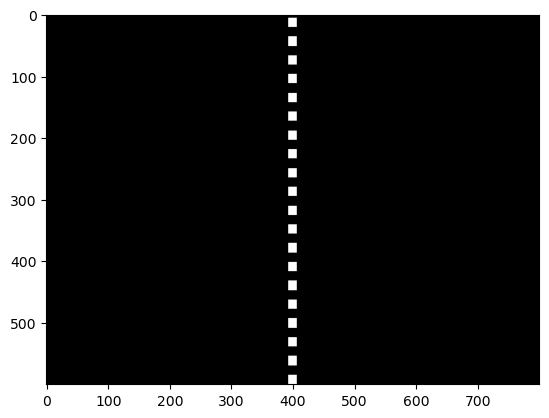

In [44]:
#pgl.verbose=1
pgl.frameGrabInit()
checkerboard = pgl.checkerboard(width=1)
checkerboard.display()
pgl.flush()

x = pgl.frameGrab()
print(x.shape)
plt.imshow(x[:,:,:])
pgl.frameGrabEnd()
#print(x[:,:,3])

In [ ]:
#checkerboard.display(stimulusPhase = 0)
#pgl.flush()
#checkerboard.temporalSquareWave = True
#pgl.commandRecord()
checkerboard = pgl.checkerboard(type='sliding',x=-5,checkWidth=1, checkHeight=1,width=10,temporalFrequency=1)
for i in range(5*60): 
    checkerboard.display()
    pgl.flush()
#pgl.commandRecordStop()
#pgl.commandList()

In [45]:
pgl.commandReplay()

In [ ]:
pgl.setTransformRotation(135)

In [11]:
pgl.open(0,800,600)
pgl.visualAngle(57,40,30)
pgl.commandRecord()
bar = pgl.bar(width=1, speed=5, dir=45)
for i in range(10*60):
    bar.display()
    pgl.flush()
pgl.flush()
pgl.commandRecordStop()

================================= pglBase:open =================================
(pglBase:open) Starting mglMetal application: /Users/justin/Library/Developer/Xcode/DerivedData/Build/Products/Debug/mglMetal.app
(pglBase:open) Using socket with address: /Users/justin/Library/Containers/gru.mglMetal/Data/pglMetal.socket.20251221_122649.TKEthiznFX
(pgl:_pglComm) .Connected to: /Users/justin/Library/Containers/gru.mglMetal/Data/pglMetal.socket.20251221_122649.TKEthiznFX
(pgl:_resolution:getResolution) Display 0/1: 1512x982 120Hz 32bits
(pgl:open) mglMetal error log can be viewed in MacOS Console app by searching for PROCESS mglMetal or in a terminal with:
           log stream --level info --process mglMetal


KeyboardInterrupt: 

In [47]:
pgl.commandReplay()

In [ ]:
device = pglTrackPixx3(pgl)
#datapixx.getError()
device.dp.TPxSetLEDIntensity(8)
#print(device.dp.TPxGetLEDIntensity())
device.calibrateEyeImage()
#device.getCameraImage()
#Image.fromarray(device.getCameraImage()).show()

In [ ]:

#from pypixxlib.propixx import PROPixx
#pgl.verbose=1
#projector = pglProPixx()
#datapixx = pglDataPixx()

for i in range(1000):
    events = pgl.devicesPoll()
    #events = datapixx.poll()
    if events is not None:
        for event in events:
            print(event)
    pgl.waitSecs(0.1)
#datapixx.setupDigitalOutput()
#datapixx.test()
#for i in range(5):
#    print(f"Polling DataPixx: {i}")
    #datapixx.poll()
    #pgl.waitSecs(1)


#device.setRearProjection(True)
#from pypixxlib.propixx import PROPixx
#propixx = PROPixx()
#propixx.getDlpSequencerProgram()
#projector.status()
#print(device)
#from pgl.pglDevice import pglDevice, pglProPixx
#huh = pglDevice(pgl,'huh')
#duh = pglProPixx(pgl)

In [49]:

#pgl.text("hello world",line=1,fontName = "Futura",fontSize=30,color=(0,0,0,1))
#pgl.text("This is the next line",x=0,line=-2)
pgl.verbose=1
textImage = pgl.textCreate("And the next line of text, that I want to draw")
pgl.text(textImage,x=0,line=-2)
pgl.text("next line")
pgl.text("wow")

pgl.flush()

(pglBase) Verbosity level set to 1
(pglImage:imageDelete) Deleting image 2 (170x51)
(pglImage:imageDelete) Deleting image 3 (102x51)


True

In [50]:
#pgl.line(0,0,1920,1080,(1,0,0),units="pix")
pgl.arc(0,0,innerRadius=0,outerRadius=10,color=(0,1,0,1))

#pgl.line(1920,0,0,1080,(0,0,1),units="pix")
pgl.flush()
#pgl.printCommandResults()

[ 0.          0.          0.          0.          1.          0.
  1.          0.         10.          0.         10.          0.
  3.14159265  0.1       ]


True

In [ ]:
pgl = pglLibrary()
pgl.open(0,880, 600)
#pgl.open()
pgl.visualAngle(57,40,30)


In [51]:
#pgl.clearScreen((0.5, 0.5, 0.5))  # Clear the screen with a gray color
#pgl.verbose=1
pgl.clearScreen((0.5, 0.5, 0.5))  # Clear the screen with a gray color
grating = pgl.grating(spatialFrequency=0.1,phase=0, contrast=1,temporalFrequency=4.0,direction=-1)
#gabor = pgl.gabor(spatialFrequency=1,orientation=45,width=40,height=30,phase=0,contrast=0.8)
#gabor.print()


(pgl:_resolution:getResolution) Display 0/2: 1512x982 120Hz 32bits
(pglBase) Main library closed


(pglProfile) Cleared all profile data.
(pgl:_resolution:getResolution) Display 0/2: 1512x982 120Hz 32bits
(pglProfile) profileModeBufferSize set to 7200 frames (60.00 seconds)
(pglProfile) Will reallocate if this is exceeded, but you can change this with pgl.profileModeBufferSize = <new size>
(pglProfile) profileMode set to 2
(pglProfile) profileMode is off, saving profile data.
(pglProfile) profileMode set to 0
-------- pglProfile 1 -------------
359 frames, 2.991 secs Screen: 1 (512x568)
Started: 2025-10-03 15:14:26 Ended: 15:14:29
Frame Rate: 120 Hz Expected Frame Time: 8.33 ms
Median frame time: 8.34 ms, 8.33 ± 1.16 mean ± std ms
Dropped frames (longer than 12.50 ms): 2 (0.56%)
  Dropped Frame 57: 17.11 ms
     ack: 2325508068.021 ms 
     commandCode: 1001
     success: 1
     processedTime: 2325508068.021 ms 
     vertexStart: 2325508324.021 ms
     vertexEnd: 2325508324.021 ms
     fragmentStart: 2325508324.021 ms
     fragmentEnd: 2325508324.021 ms
     drawableAcquired: -23278

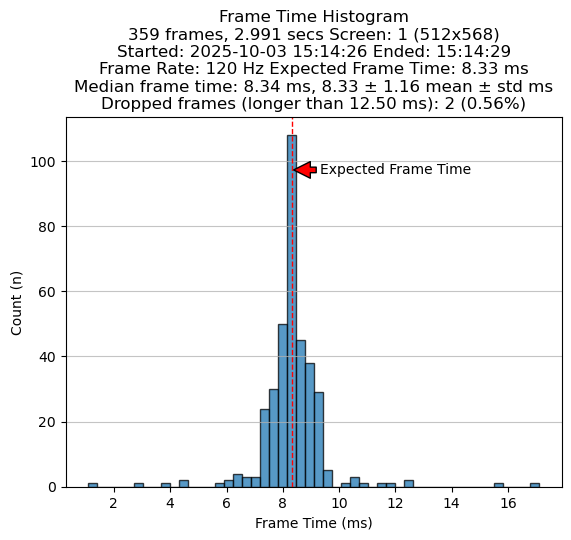

In [52]:

pgl.profileModeClearAll()
pgl.profileMode = 2
#pgl.batchStart()
for i in range(360):
    grating.display()
    pgl.flush()
pgl.profileMode = 0
#pgl.flush()
#pgl.waitSecs(1)
#pgl.batchRun()
#pgl.waitSecs(2)
#pgl.batchEnd()
#pgl.waitSecs(2)

pgl.profileModeDisplay()

(pglProfile) Cleared all profile data.
120
(pgl:_resolution:getResolution) Display 0/2: 1512x982 120Hz 32bits
(pgl:_resolution:getResolution) Display 0/2: 1512x982 120Hz 32bits
(pglProfile) profileMode set to 2
(pglProfile) profileMode is off, saving profile data.
(pglProfile) profileMode set to 0
-------- pglProfile 1 -------------
120 frames, 1.000 secs Screen: 1 (512x568)
Started: 2025-10-03 15:14:53 Ended: 15:14:54
Frame Rate: 120 Hz Expected Frame Time: 8.33 ms
Median frame time: 8.29 ms, 8.33 ± 1.45 mean ± std ms
Dropped frames (longer than 12.50 ms): 2 (1.67%)
  Dropped Frame 66: 16.17 ms
     ack: 2325534665.463 ms 
     commandCode: 1001
     success: 1
     processedTime: 2325534665.463 ms 
     vertexStart: 2325534665.463 ms
     vertexEnd: 2325534665.463 ms
     fragmentStart: 2325534665.463 ms
     fragmentEnd: 2325534665.463 ms
     drawableAcquired: -2327860.210 ms
     drawablePresented: -2327860.210 ms
  Dropped Frame 76: 13.68 ms
     ack: 2325534665.376 ms 
     comm

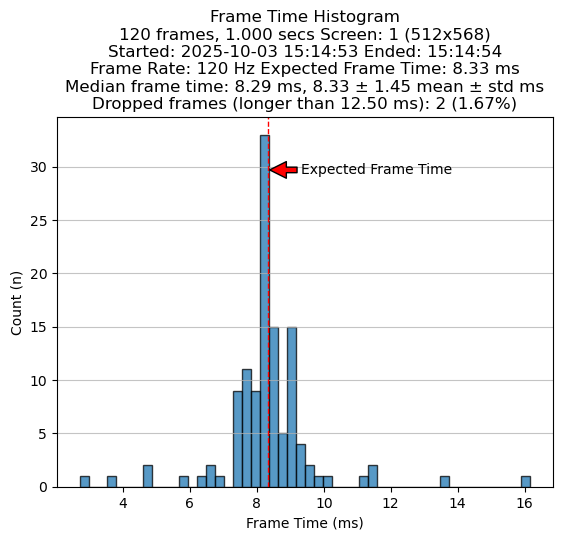

In [54]:
pgl.profileModeClearAll()
#pgl.fullScreen(True)
_,_,frameRate,_ =pgl.getResolution()
print(frameRate)
pgl.profileMode = 2
#print(pgl.profileMode)
#print(pgl.profileModeBufferSize )
pgl.clearScreen([0,0,0])
pgl.flush()
for i in range(frameRate*1):
    pgl.dots(np.random.uniform(-20,20),np.random.uniform(-15,15))
    #pgl.printCommandResults()
    pgl.flush()
pgl.profileMode = 0
#pgl.fullScreen(False)
pgl.profileModeDisplay()


In [13]:
_,_,frameRate,_ =pgl.getResolution()
pgl.profileModeClearAll()
pgl.batchStart()
for i in range(frameRate*5):
    #im.display()
    pgl.dots(np.random.uniform(-20,20),np.random.uniform(-15,15))
    #pgl.printCommandResults()
    #pgl.printCommandResults()


    pgl.flush()
    #pgl.printCommandResults()
#pgl.batchRun()
#pgl.batchEnd()

(pglProfile) Cleared all profile data.(pgl:_resolution:getResolution) Display 1/2: 2560x1440 60Hz 32bits

(pgl:_resolution:getResolution) Display 1/2: 2560x1440 60Hz 32bits
(pglBatch:batchStart) Batch started.


In [ ]:
pgl.batchRun()
pgl.batchEnd()
pgl.profileModeDisplay()

In [56]:
imData = Image.open('/Users/justin/proj/pgl/testimage.jpg')
#pgl.visualAngle(57,40,30)
pgl.imageDisplay(imData)
pgl.flush()

(pglImage:imageDelete) Deleting image 34 (5616x3744)


True